In [44]:
import numpy as np                 
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

## Stationarity Check

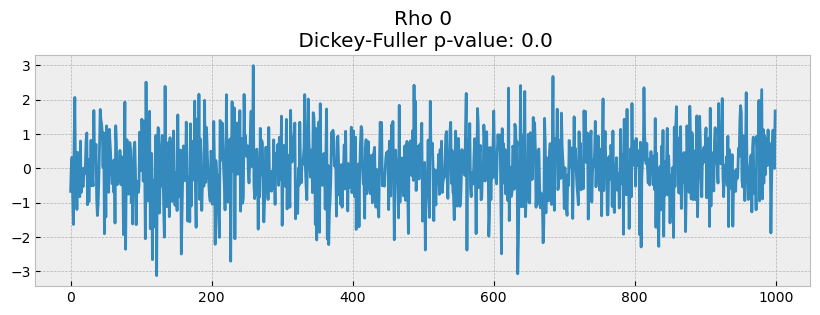

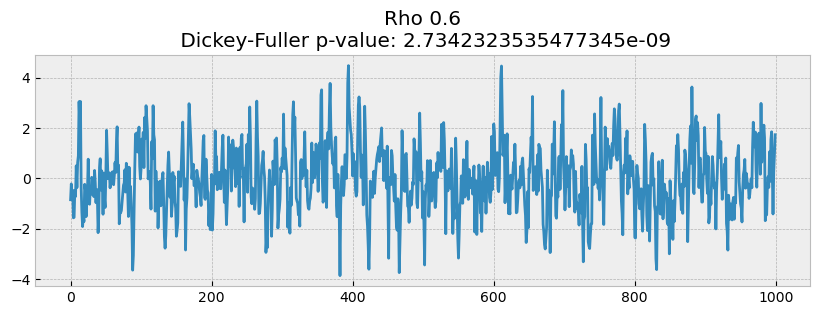

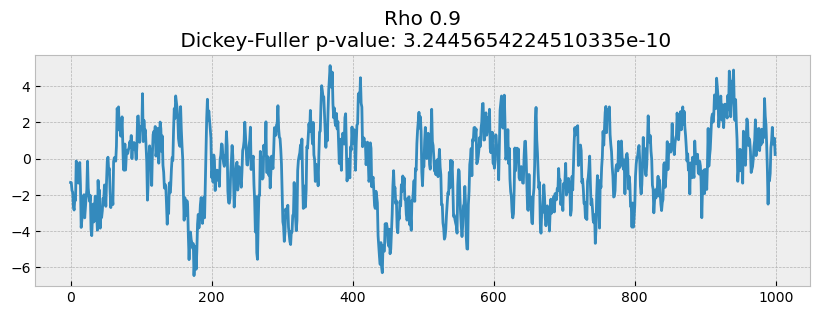

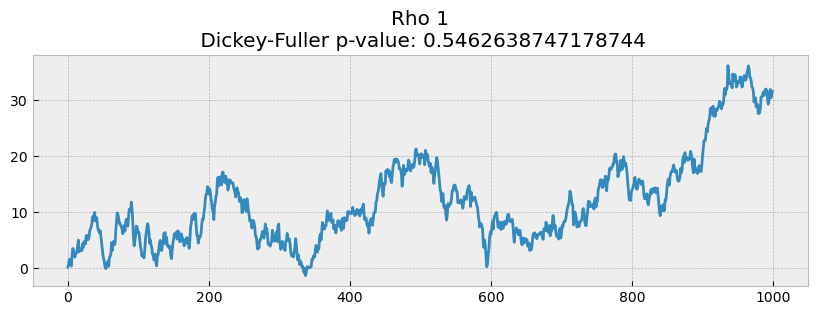

In [45]:
def plotProcess(n_samples=1000, rho=0):
    x = w = np.random.normal(size=n_samples)
    for t in range(n_samples):
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, sm.tsa.stattools.adfuller(x)[1]))
        plt.show()
        
for rho in [0, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

## Non-stationary to Stationary

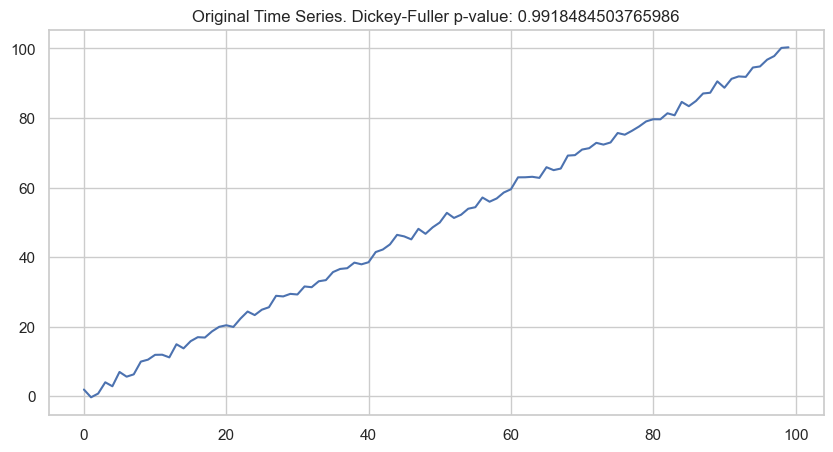

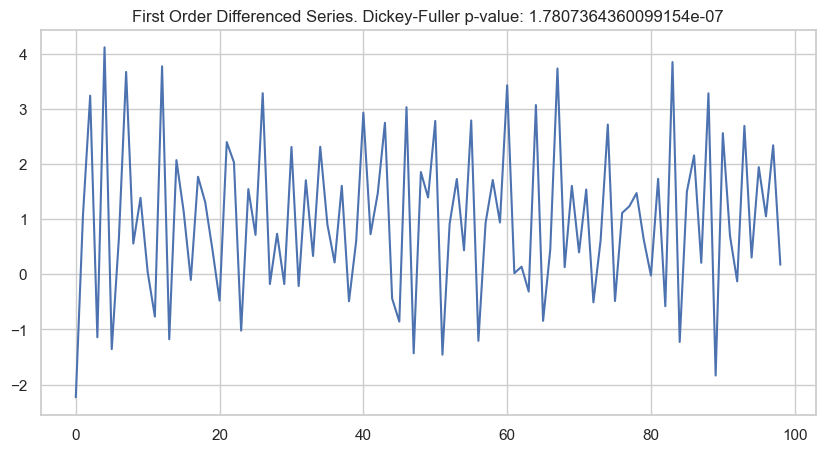

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample non-stationary time series with a trend
time = np.arange(100)
series = time + np.random.normal(0, 1, 100)

# Plot the original series
plt.figure(figsize=(10, 5))
plt.plot(series)
plt.title(f'Original Time Series. Dickey-Fuller p-value: {sm.tsa.stattools.adfuller(series)[1]}')
plt.show()

# First order differencing
first_diff = np.diff(series, n=1)

# Plot the differenced series
plt.figure(figsize=(10, 5))
plt.plot(first_diff)
plt.title(f'First Order Differenced Series. Dickey-Fuller p-value: {sm.tsa.stattools.adfuller(first_diff)[1]}')
plt.show()


## Smoothning

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
print(data.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


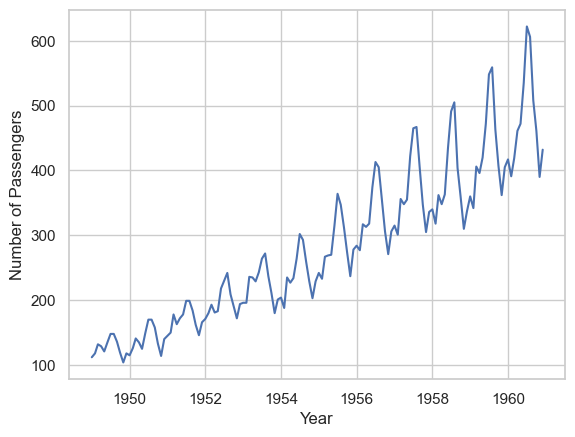

In [80]:
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()


### Simple Exponential Smoothing (SES)

In [81]:
from statsmodels.tsa.api import SimpleExpSmoothing
model = SimpleExpSmoothing(data)
model_single_fit = model.fit()


c:\Users\puroshotam\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [82]:
forecast_single = model_single_fit.forecast(6)
print(forecast_single)


1961-01-01    431.791781
1961-02-01    431.791781
1961-03-01    431.791781
1961-04-01    431.791781
1961-05-01    431.791781
1961-06-01    431.791781
Freq: MS, dtype: float64


In [83]:
forecast_single = model_single_fit.forecast(40)


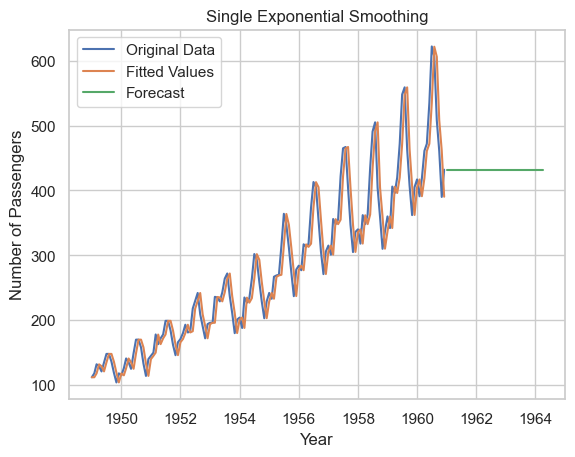

In [84]:
plt.plot(data, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_single, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show()


### Double Exponential Smoothening

In [85]:
from statsmodels.tsa.api import Holt

model_double = Holt(data)
model_double_fit = model_double.fit()


c:\Users\puroshotam\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [86]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)


1961-01-01    436.196220
1961-02-01    440.578651
1961-03-01    444.961083
1961-04-01    449.343515
1961-05-01    453.725946
1961-06-01    458.108378
Freq: MS, dtype: float64


In [87]:
forecast_double = model_double_fit.forecast(40)


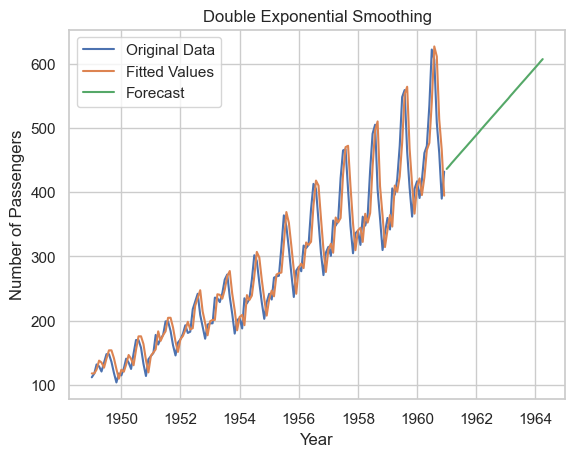

In [88]:
plt.plot(data, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()


### Triple Exponential Smoothening

In [89]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    data, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()


c:\Users\puroshotam\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [90]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)


1961-01-01    451.577073
1961-02-01    427.257748
1961-03-01    464.699360
1961-04-01    500.103185
1961-05-01    508.660794
1961-06-01    567.713873
Freq: MS, dtype: float64


In [91]:
forecast_triple = model_triple_fit.forecast(40)


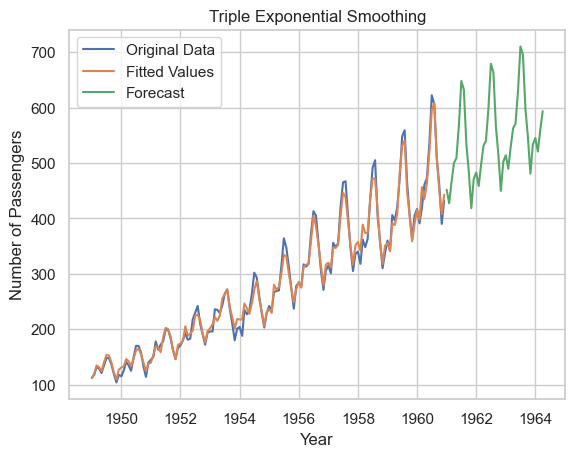

In [92]:
plt.plot(data, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()


When to use Exponential Smoothing
The selection of an exponential smoothing method is dependent on the properties of the time series and the forecasting needs.


Simple Exponential Smoothing (SES):

SES best suits time series data with no trend and no seasonality. It is basic, which can be applied when there is no overall systematics in trends or anomalies and straightforward forecasting based on the last observation and the preceding forecast. Because SES is based on computing and is simple to set up, it’s ideal for forecasting in real time or where there’s a lack of data.


Holt’s Linear Smoothing:

Holt’s Linear Smoothing is used for time series data with a trend. A trend is a systematic change in a time series value over time. It’s an extension of Simple Exponential Smoothing that includes a trend component along with the level component. This allows for trend patterns to be captured in the data.
Holt’s Linear Smoothing is used when the data has a consistent upward or down trend. A forecast that takes into account both current level and trend is required.
It is also used when the data does not have seasonality but has a trend.


Holt-Winter’s Seasonal Smoothing:

Holt-Winter’s seasonal smoothing is used in cases of trend and seasonality time series data. It is an extension of the DES, adding a seasonal component to the level and trend components such that seasonal patterns in data could be captured.
Holt-Winter’s Seasonal Smoothing method can be applied where the data exhibits both the trend and the repeating pattern over time, like monthly seasonality or quarterly seasonality. In this regard, Holt-Winter’s Seasonal Smoothing is able to produce forecasts that can keep up with the current level, trend, and seasonality, thus being very suitable for forecasting situations where the trend and seasonality coexist.